In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('rapidLowRatingData.csv')
chessdata['Opening_new'].describe()


count                 10215
unique                   86
top       Queen's Pawn Game
freq                   1032
Name: Opening_new, dtype: object

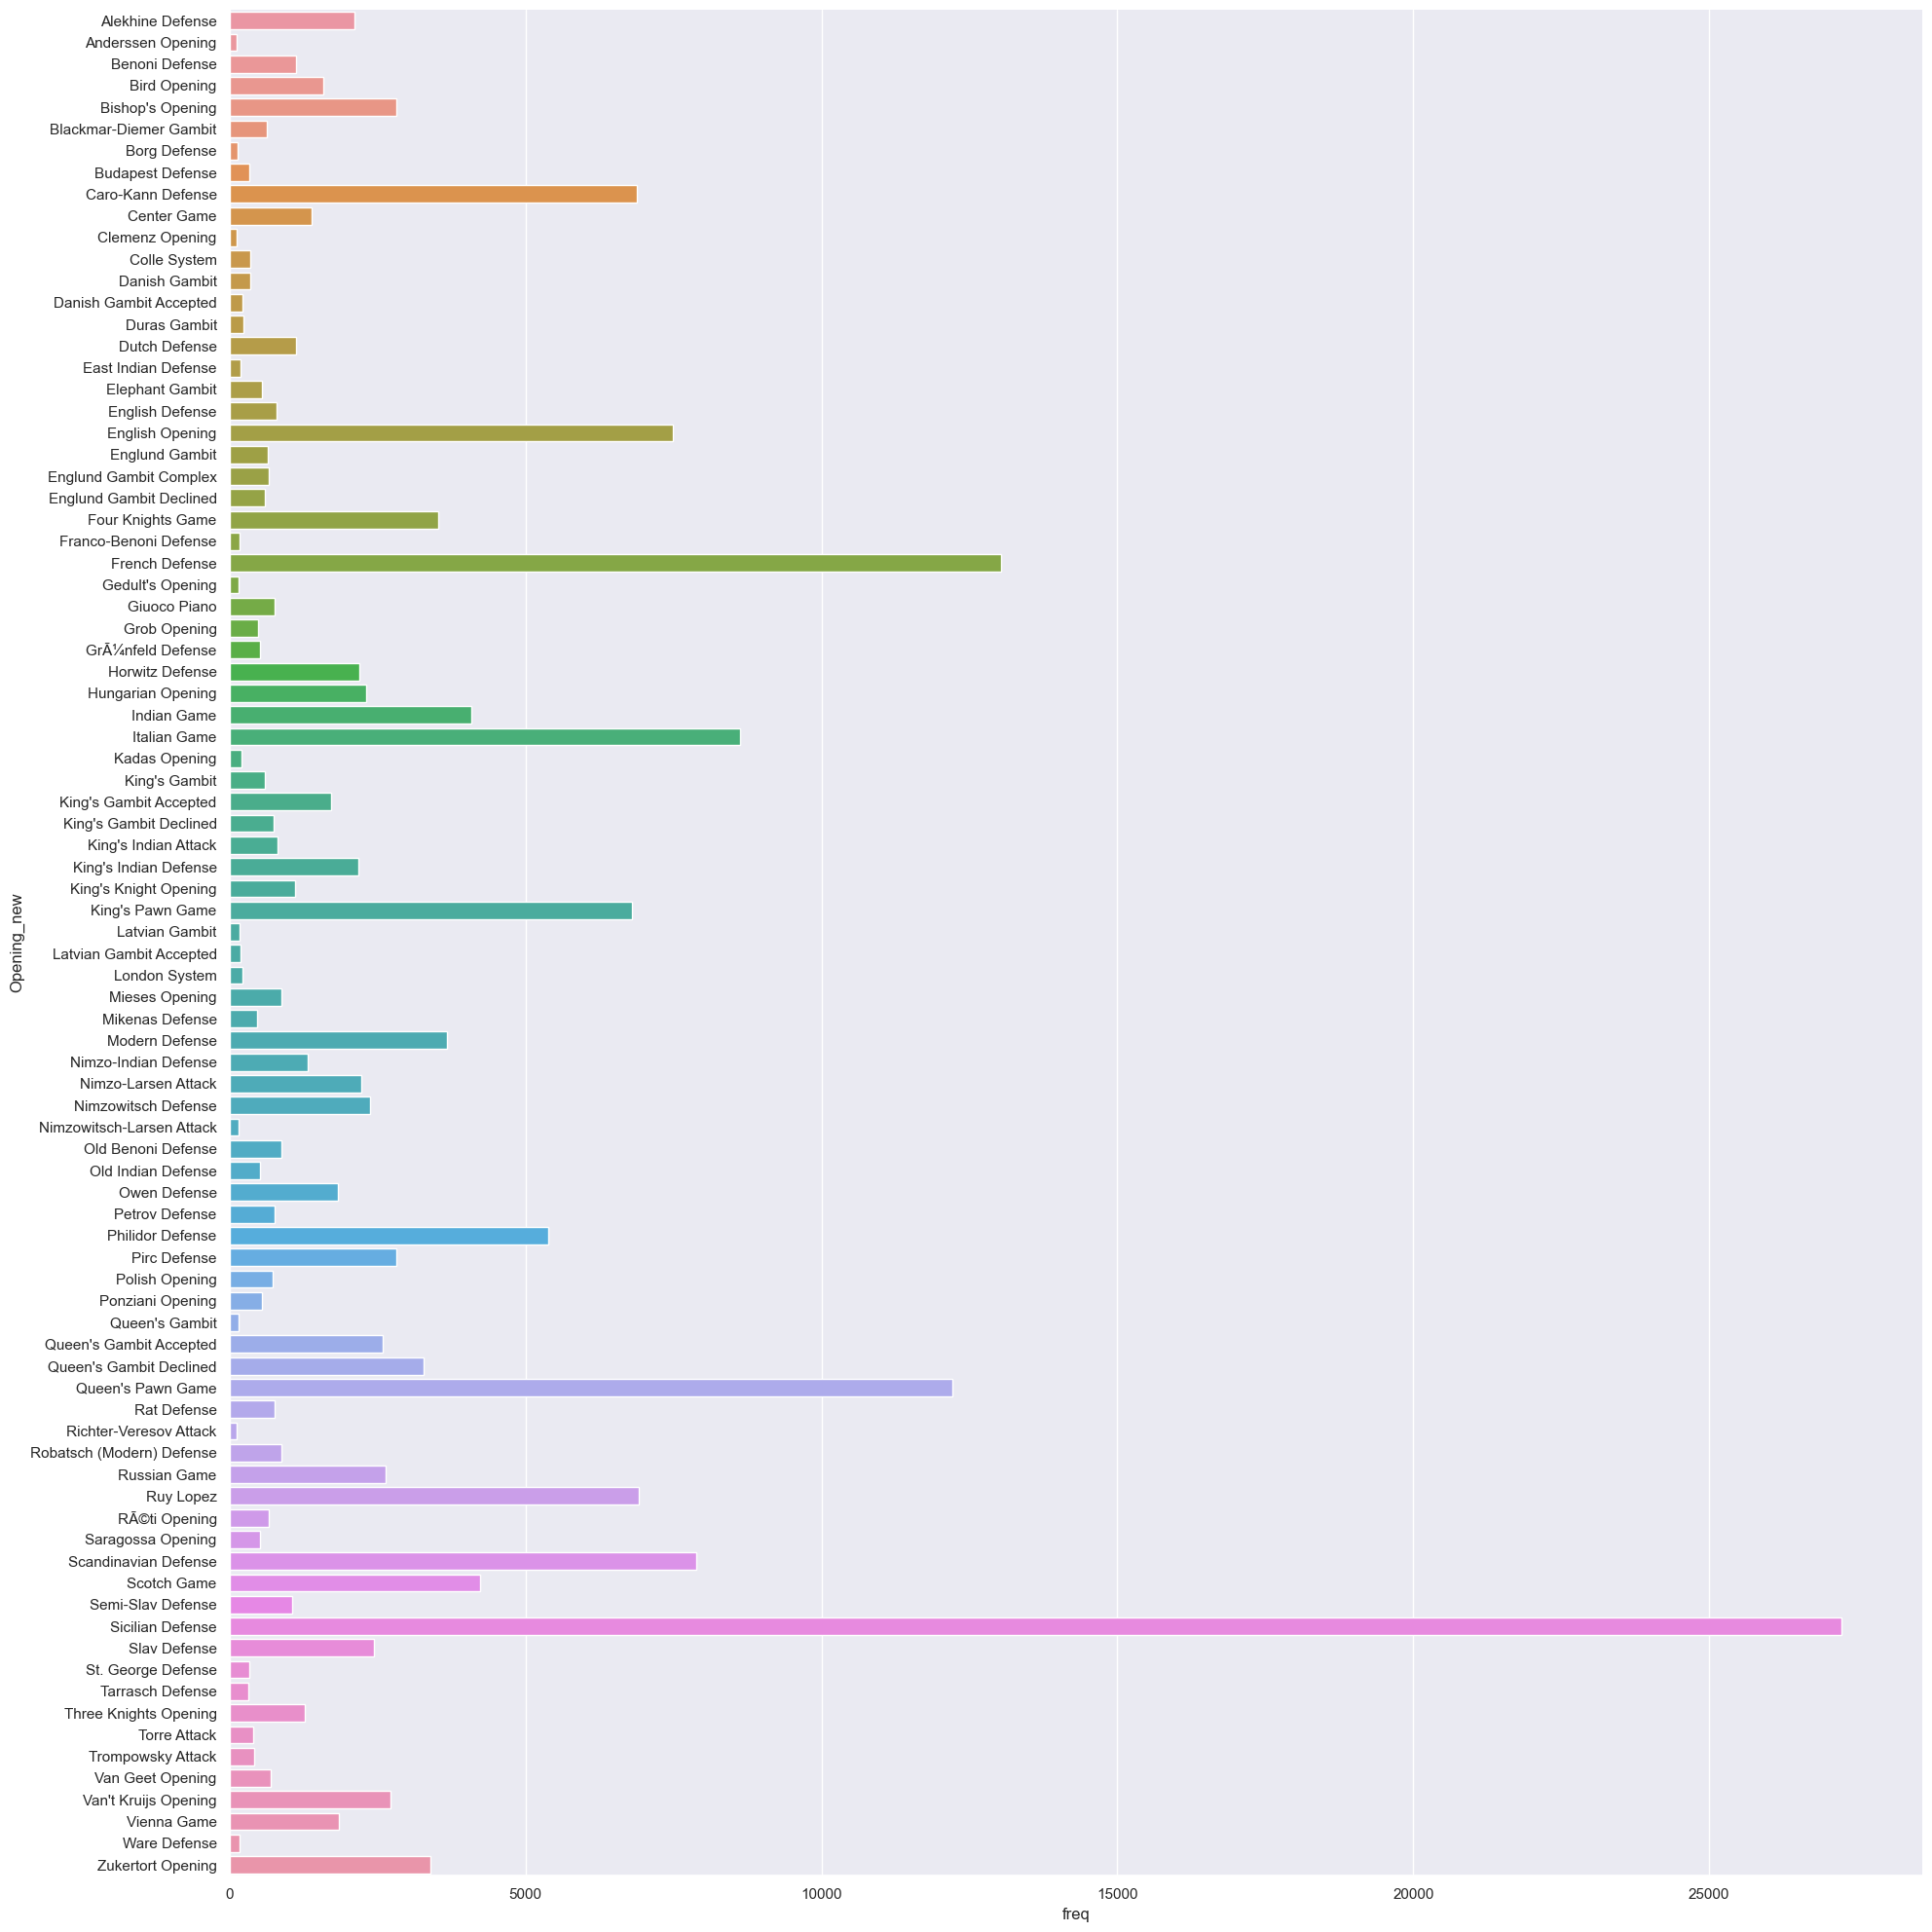

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_3692\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_3692\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
1379,Trompowsky Attack,11,1,0.090909
3755,GrÃ¼nfeld Defense,5,1,0.2
109,Nimzo-Larsen Attack,60,17,0.283333
45,Saragossa Opening,34,10,0.294118
728,Colle System,10,3,0.3
...,...,...,...,...
686,St. George Defense,14,11,0.785714
290,Nimzo-Indian Defense,14,11,0.785714
298,Englund Gambit,25,20,0.8
134,Queen's Gambit,14,12,0.857143


Win rate for white

In [6]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
95,Van't Kruijs Opening,218,83,0.380734
69,Indian Game,126,50,0.396825
9,Center Game,148,60,0.405405
54,Caro-Kann Defense,201,84,0.41791
1,Sicilian Defense,853,370,0.433763
55,Nimzowitsch Defense,198,87,0.439394
94,Bishop's Opening,207,91,0.439614
39,English Opening,258,114,0.44186
83,Hungarian Opening,107,49,0.457944
36,Modern Defense,148,69,0.466216


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_3692\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_3692\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
2954,Nimzowitsch-Larsen Attack,4,0,0.0
134,Queen's Gambit,14,2,0.142857
298,Englund Gambit,25,5,0.2
686,St. George Defense,14,3,0.214286
290,Nimzo-Indian Defense,14,3,0.214286
...,...,...,...,...
4316,Latvian Gambit Accepted,6,4,0.666667
45,Saragossa Opening,34,23,0.676471
728,Colle System,10,7,0.7
3755,GrÃ¼nfeld Defense,5,4,0.8


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
18,Queen's Gambit Accepted,161,53,0.329193
2,Philidor Defense,419,162,0.386635
0,Scotch Game,248,96,0.387097
93,Russian Game,236,94,0.398305
61,Scandinavian Defense,457,189,0.413567
29,Vienna Game,161,69,0.428571
20,Three Knights Opening,143,63,0.440559
11,Ruy Lopez,365,161,0.441096
34,Horwitz Defense,113,50,0.442478
157,Zukertort Opening,121,54,0.446281


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10215 non-null  int64  
 1   BlackElo      10215 non-null  int64  
 2   ECO           10215 non-null  object 
 3   Event         10215 non-null  object 
 4   Opening       10215 non-null  object 
 5   Result        10215 non-null  object 
 6   Termination   10215 non-null  object 
 7   TimeControl   10215 non-null  object 
 8   WhiteElo      10215 non-null  int64  
 9   BlackTitle    0 non-null      float64
 10  WhiteTitle    0 non-null      float64
 11  Move_ply_200  5 non-null      object 
 12  Category      10215 non-null  object 
 13  Opening_new   10215 non-null  object 
 14  freq          10215 non-null  int64  
 15  ELO Diff      10215 non-null  int64  
 16  Ave ELO       10215 non-null  float64
 17  tot           10215 non-null  int64  
dtypes: float64(3), int64(6), o

In [13]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [14]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5674125874125874

Test Data
Accuracy  :	 0.5572593800978792



[Text(0.5220070422535211, 0.9285714285714286, 'ELO Diff <= -11.5\ngini = 0.518\nsamples = 7150\nvalue = [3384, 136, 3630]\nclass = White'),
 Text(0.22887323943661972, 0.7857142857142857, 'ELO Diff <= -152.5\ngini = 0.516\nsamples = 2939\nvalue = [1573, 60, 1306]\nclass = Black'),
 Text(0.11267605633802817, 0.6428571428571429, 'Opening_new_Ruy Lopez <= 0.5\ngini = 0.45\nsamples = 404\nvalue = [269, 3, 132]\nclass = Black'),
 Text(0.07042253521126761, 0.5, 'Opening_new_Van Geet Opening <= 0.5\ngini = 0.443\nsamples = 392\nvalue = [265, 3, 124]\nclass = Black'),
 Text(0.056338028169014086, 0.35714285714285715, 'ELO Diff <= -225.5\ngini = 0.439\nsamples = 389\nvalue = [265, 3, 121]\nclass = Black'),
 Text(0.028169014084507043, 0.21428571428571427, 'Opening_new_Slav Defense <= 0.5\ngini = 0.382\nsamples = 167\nvalue = [124, 0, 43]\nclass = Black'),
 Text(0.014084507042253521, 0.07142857142857142, 'gini = 0.373\nsamples = 165\nvalue = [124, 0, 41]\nclass = Black'),
 Text(0.04225352112676056,

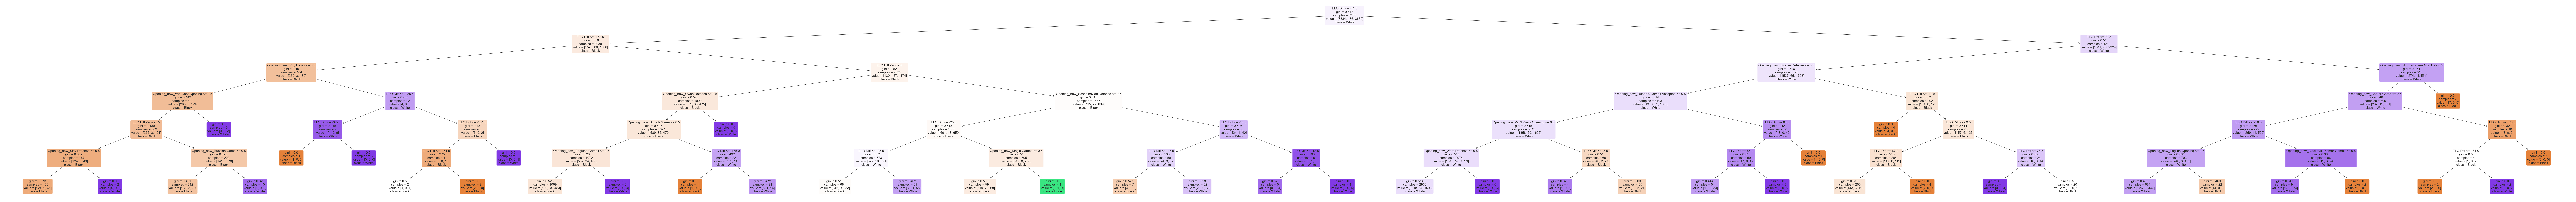

In [15]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

![The Philidor Defence](lowphoto/left.png "Title")

![The Philidor Defence](lowphoto/right.png "Title")